In [1]:
pip install "qiskit[visualization]"


Note: you may need to restart the kernel to use updated packages.


In [2]:
#import theano
#theano.config.optimizer = 'None'

In [3]:
import numpy as np
import pandas as pd

# Import Qiskit
import qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import Statevector
import qiskit.quantum_info as qi

import arviz as az

In [4]:
#pip install 'arviz==0.13.0'
! pip install 'pymc'
import pymc as pm

In [5]:
pip install "qiskit-aer"

Note: you may need to restart the kernel to use updated packages.


In [6]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [48]:
def generate_probabilities():
    while True:
        p_x, p_y, p_z = np.random.rand(3)  # Generate random probabilities between 0 and 1
        constraint = (p_x - 0.5)**2 + (p_y - 0.5)**2 + (p_z - 0.5)**2
        if constraint < 0.25:
            return p_x, p_y, p_z  # Return the probabilities if the constraint is satisfied

p_x, p_y, p_z = generate_probabilities()

theta_x = 2 * np.arccos(np.sqrt(p_x))
theta_y = 2 * np.arccos(np.sqrt(p_y))
theta_z = 2 * np.arccos(np.sqrt(p_z))



In [49]:
p_x

0.46036011474276917

In [50]:
p_y

0.4581487840712398

In [51]:
p_z

0.6606899746807426

In [62]:
qc = QuantumCircuit(1)

qc.rx(theta_x, 0)
qc.ry(theta_y, 0)
qc.rz(theta_z, 0)

In [9]:
# qc.measure_all()

In [53]:
sv = qi.Statevector.from_instruction(qc)
sv.draw(output = 'latex')

<IPython.core.display.Latex object>

In [54]:
dm = qiskit.quantum_info.DensityMatrix(sv, dims=None)
dm

DensityMatrix([[0.50331795+1.06772557e-18j, 0.4592901 +1.97589465e-01j],
               [0.4592901 -1.97589465e-01j, 0.49668205-2.12003888e-18j]],
              dims=(2,))


In [63]:
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)
qc.measure_all()
result = simulator.run(qc, shots=9999).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='counts')
counts

{'1': 5086, '0': 4913}

In [64]:

no1s = counts['1']
no0s = counts['0']
tr=[]
tr.extend(no1s*[1])
tr.extend(no0s*[0])
tr

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [1]:
import pymc

In [15]:
from pymc import *
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city

Output()

Inference data with groups:
	> posterior
	> observed_data

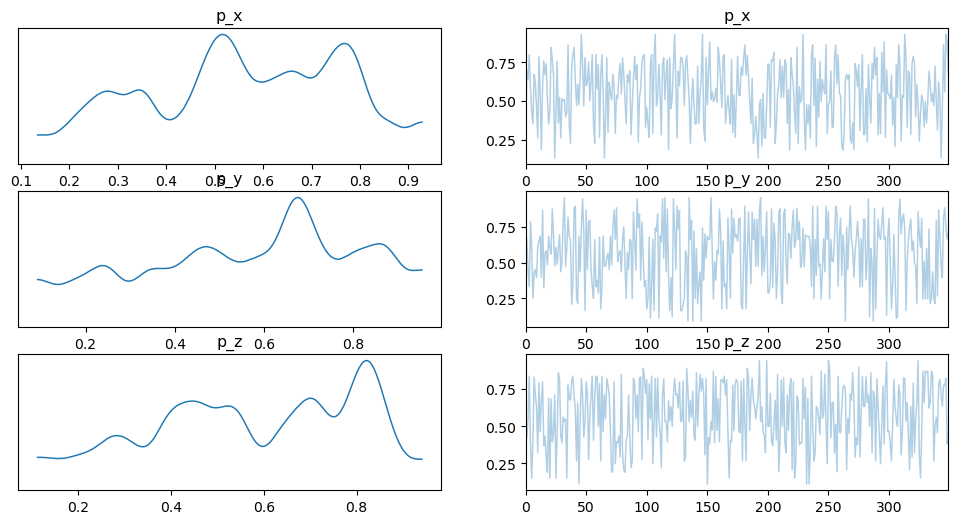

In [69]:
num_samples = 350



# Define a function to calculate the constraints

def constraint(p_x, p_y, p_z):
    return (p_x - 0.5)**2 + (p_y - 0.5)**2 + (p_z - 0.5)**2 < 0.25


with pm.Model() as model:
    # Define priors for the parameters representing the quantum state
    p_x = pm.Beta('p_x', alpha=2, beta=2)  
    p_y = pm.Beta('p_y', alpha=2, beta=2)  
    p_z = pm.Beta('p_z', alpha=2, beta=2)  
    
    # Apply constraint

    pm.Potential('constraint', pm.math.switch(constraint(p_x, p_y, p_z), 0, -np.inf))

    # Define likelihood based on the measurement outcomes
    likelihood = pm.Binomial('likelihood', n=1, p=p_x*p_y*p_z, observed=tr)
    approx = pm.fit(method='svgd', n=850)

posterior_samples = approx.sample(num_samples)
pm.plot_trace(posterior_samples)


posterior_samples
